In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the image and apply two-dimensional Fast Fourier transformation to decompose the given image into its sine and cosine components. Display the output of the transformation represents the image in the Fourier or frequency domain.

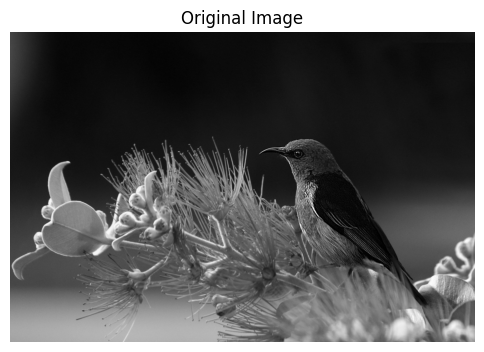

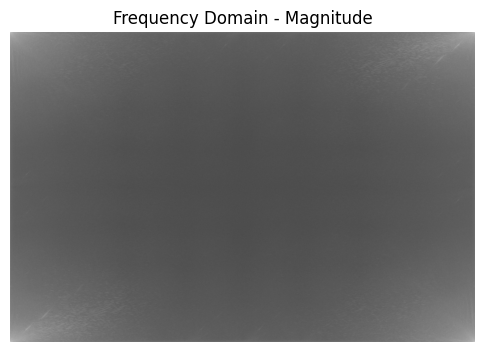

In [2]:
img = cv2.imread('bird.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6,6))
plt.title('Original Image')
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

f = np.fft.fft2(gray)
f_mag = np.abs(f)

plt.figure(figsize=(6,6))
plt.title('Frequency Domain - Magnitude')
plt.imshow(np.log(1 + f_mag), cmap='gray')
plt.axis('off')
plt.show()

# 2. Shift all low frequency components to the center of the image and display the Fourier spectrum

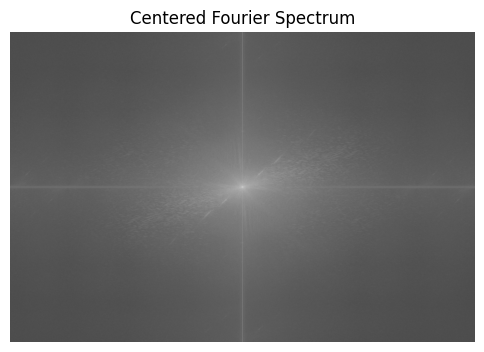

In [3]:
fshift = np.fft.fftshift(f)
fshift_mag = np.abs(fshift)

plt.figure(figsize=(6,6))
plt.title('Centered Fourier Spectrum')
plt.imshow(np.log(1 + fshift_mag), cmap='gray')
plt.axis('off')
plt.show()

# 3. Create Ideal Low pass filter with the original image size

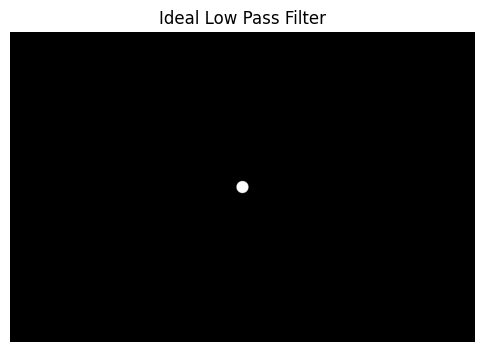

In [4]:
rows, cols = gray.shape
crow, ccol = rows // 2, cols // 2
radius = 80

mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)

plt.figure(figsize=(6,6))
plt.title('Ideal Low Pass Filter')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

# 4. Multiply the shifted image with the created ideal low pass filter

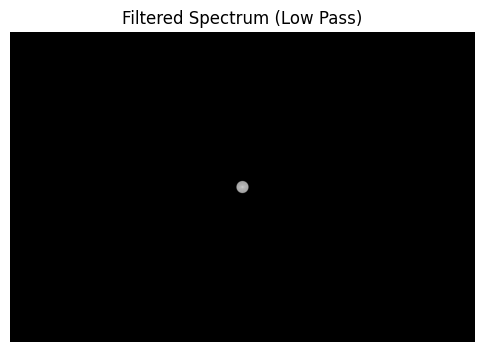

In [5]:
fshift_low = fshift * mask

plt.figure(figsize=(6,6))
plt.title('Filtered Spectrum (Low Pass)')
plt.imshow(np.log(1 + np.abs(fshift_low)), cmap='gray')
plt.axis('off')
plt.show()

# 5. Decentralize all frequency components in the image

In [6]:
f_ishift_low = np.fft.ifftshift(fshift_low)

# 6. Apply inverse Fourier transform operation to restore the image in spatial domain

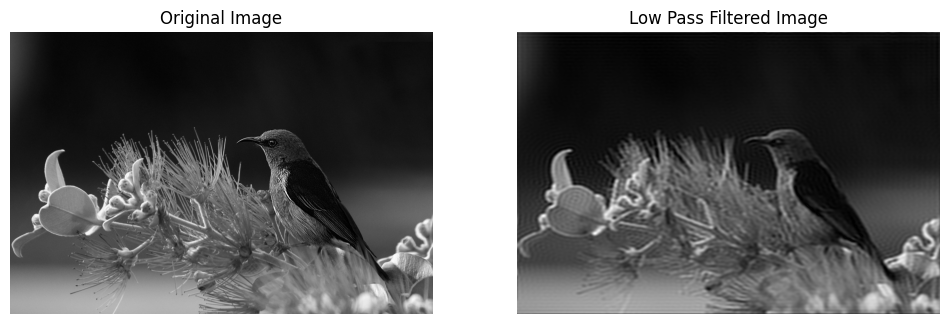

In [7]:
img_back_low = np.fft.ifft2(f_ishift_low)
img_back_low = np.abs(img_back_low)

plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Low Pass Filtered Image')
plt.imshow(img_back_low, cmap='gray')
plt.axis('off')
plt.show()

# 7. Create Ideal High Pass filter

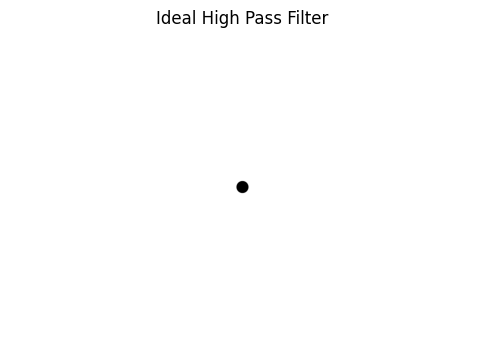

In [8]:
mask_hp = np.ones((rows, cols), np.uint8)
cv2.circle(mask_hp, (ccol, crow), radius, 0, thickness=-1)

plt.figure(figsize=(6,6))
plt.title('Ideal High Pass Filter')
plt.imshow(mask_hp, cmap='gray')
plt.axis('off')
plt.show()

# 8. Multiply the shifted image with the created ideal high pass filter and detect the edges

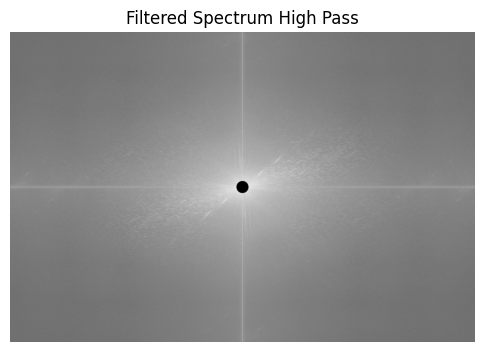

In [9]:
fshift_high = fshift * mask_hp

plt.figure(figsize=(6,6))
plt.title('Filtered Spectrum High Pass')
plt.imshow(np.log(1 + np.abs(fshift_high)), cmap='gray')
plt.axis('off')
plt.show()

# 9. Decentralize all frequency components in the image

In [10]:
f_ishift_high = np.fft.ifftshift(fshift_high)

# 10. Apply inverse Fourier transform operation to restore the image in spatial domain

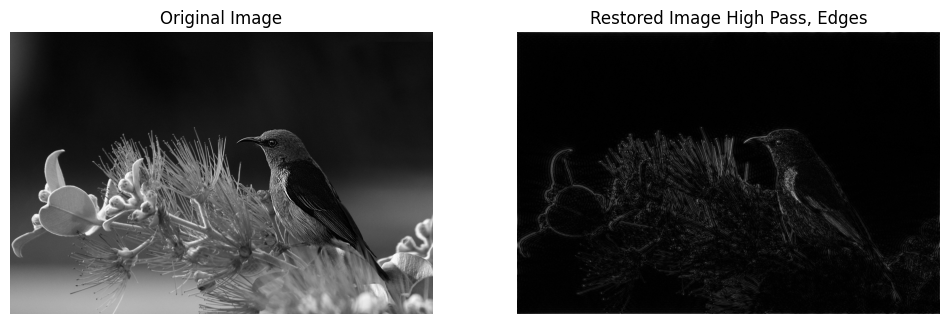

In [11]:
img_back_high = np.fft.ifft2(f_ishift_high)
img_back_high = np.abs(img_back_high)

plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Restored Image High Pass, Edges')
plt.imshow(img_back_high, cmap='gray')
plt.axis('off')
plt.show()

# Butterworth Filter Implementation

In [12]:
def butterworth_filter(shape, cutoff, order, type='low'):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x = np.arange(cols) - ccol
    y = np.arange(rows) - crow
    X, Y = np.meshgrid(x, y)
    D = np.sqrt(X**2 + Y**2)
    
    if type == 'low':
        H = 1 / (1 + (D / cutoff)**(2 * order))
    else:
        H = 1 - 1 / (1 + (D / cutoff)**(2 * order))
    
    return H

# Butterworth Low Pass Filter

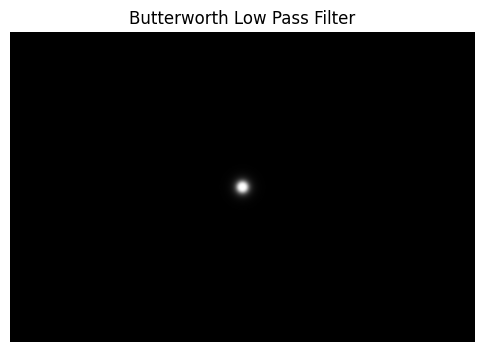

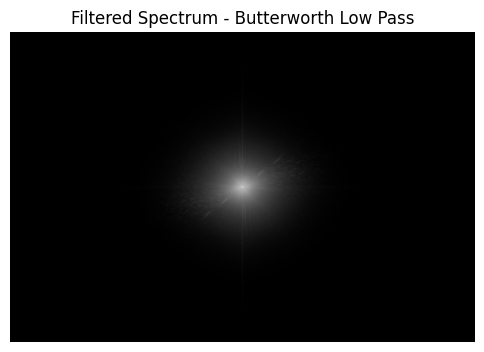

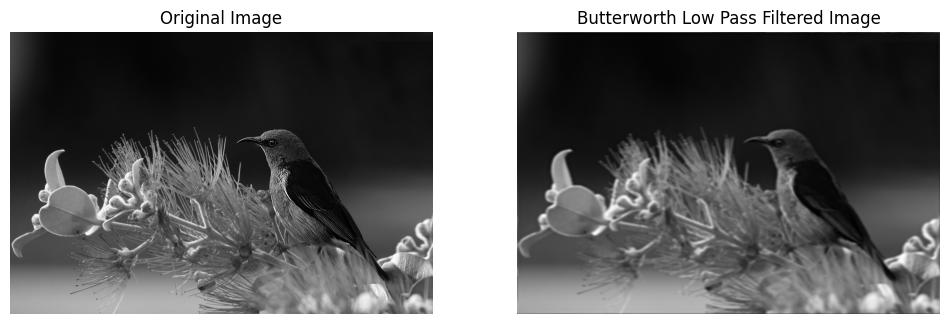

In [13]:
cutoff = 80
order = 2

# Butterworth Low Pass
bw_low = butterworth_filter(gray.shape, cutoff, order, type='low')

plt.figure(figsize=(6,6))
plt.title('Butterworth Low Pass Filter')
plt.imshow(bw_low, cmap='gray')
plt.axis('off')
plt.show()

fshift_bw_low = fshift * bw_low

plt.figure(figsize=(6,6))
plt.title('Filtered Spectrum - Butterworth Low Pass')
plt.imshow(np.log(1 + np.abs(fshift_bw_low)), cmap='gray')
plt.axis('off')
plt.show()

# Inverse shift and restore image
f_ishift_bw_low = np.fft.ifftshift(fshift_bw_low)
img_back_bw_low = np.fft.ifft2(f_ishift_bw_low)
img_back_bw_low = np.abs(img_back_bw_low)

plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Butterworth Low Pass Filtered Image')
plt.imshow(img_back_bw_low, cmap='gray')
plt.axis('off')
plt.show()

# Butterworth High Pass Filter

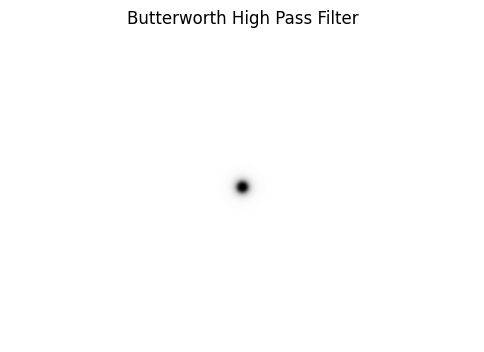

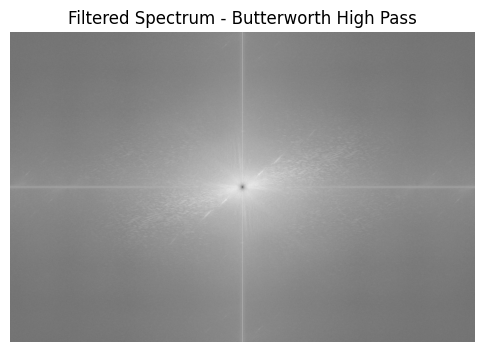

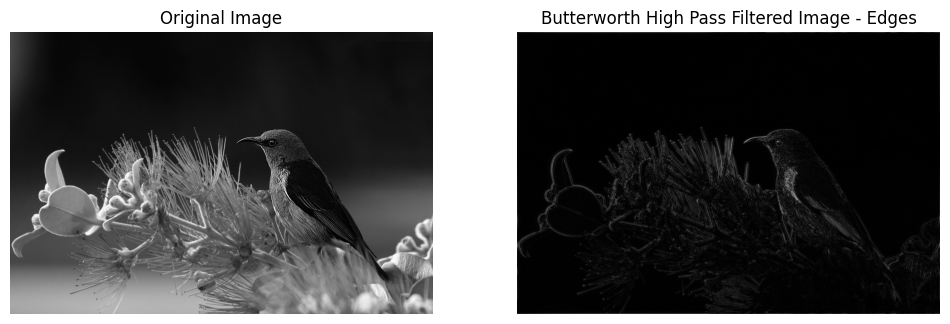

In [14]:
# Butterworth High Pass
bw_high = butterworth_filter(gray.shape, cutoff, order, type='high')

plt.figure(figsize=(6,6))
plt.title('Butterworth High Pass Filter')
plt.imshow(bw_high, cmap='gray')
plt.axis('off')
plt.show()

fshift_bw_high = fshift * bw_high

plt.figure(figsize=(6,6))
plt.title('Filtered Spectrum - Butterworth High Pass')
plt.imshow(np.log(1 + np.abs(fshift_bw_high)), cmap='gray')
plt.axis('off')
plt.show()

# Inverse shift and restore image
f_ishift_bw_high = np.fft.ifftshift(fshift_bw_high)
img_back_bw_high = np.fft.ifft2(f_ishift_bw_high)
img_back_bw_high = np.abs(img_back_bw_high)

plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Butterworth High Pass Filtered Image - Edges')
plt.imshow(img_back_bw_high, cmap='gray')
plt.axis('off')
plt.show()